In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('sentimentdataset.csv')

# Dataset overview
print("Shape of dataset:", df.shape)
print("\nData types and null counts:\n")
print(df.info())
df.head()


Shape of dataset: (732, 15)

Data types and null counts:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB
None


,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [2]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Fill or drop missing values
df.dropna(inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Check class balance
print(df['label'].value_counts())

# Example text cleaning
import re
def clean_text(text):
    text = re.sub(r"http\S+", "", text)  # Remove links
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # Remove punctuation
    text = text.lower()  # Lowercase
    return text

df['clean_text'] = df['text'].apply(clean_text)


Missing values:
 Unnamed: 0.1    0
Unnamed: 0      0
Text            0
Sentiment       0
Timestamp       0
User            0
Platform        0
Hashtags        0
Retweets        0
Likes           0
Country         0
Year            0
Month           0
Day             0
Hour            0
dtype: int64


KeyError: 'label'

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of classes
sns.countplot(data=df, x='label')
plt.title("Label Distribution")
plt.show()

# Word clouds
from wordcloud import WordCloud

positive_text = " ".join(df[df['label'] == 'positive']['clean_text'])
negative_text = " ".join(df[df['label'] == 'negative']['clean_text'])

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Positive Words")
plt.imshow(WordCloud(background_color="white").generate(positive_text))
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Negative Words")
plt.imshow(WordCloud(background_color="white").generate(negative_text))
plt.axis("off")
plt.show()


ValueError: Could not interpret value `label` for `x`. An entry with this name does not appear in `data`.

In [6]:
print(df.columns)
# Example if the correct column name is 'sentiment'
print(df['Sentiment'].value_counts())



Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour'],
      dtype='object')
Sentiment
Positive           44
Joy                42
Excitement         32
Neutral            14
Contentment        14
                   ..
Adrenaline          1
Harmony             1
ArtisticBurst       1
Radiance            1
Elegance            1
Name: count, Length: 279, dtype: int64


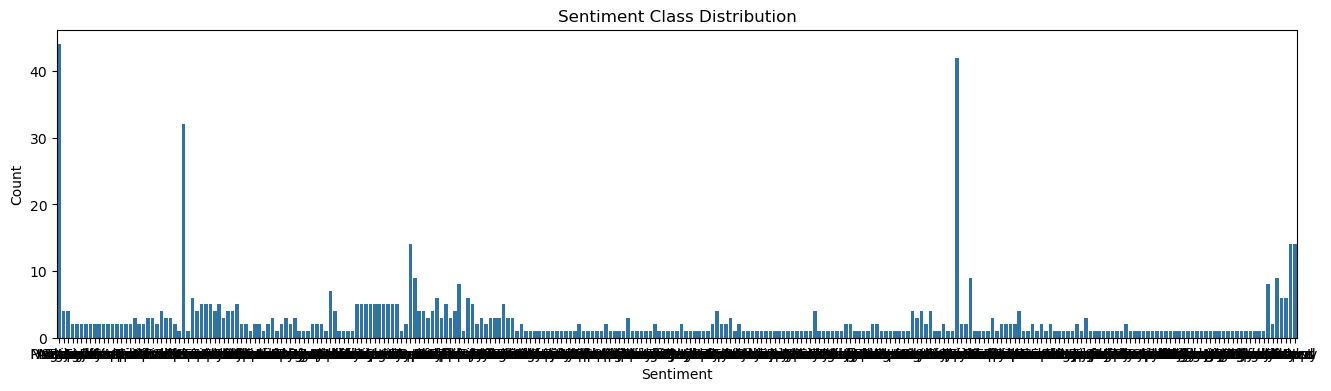

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of sentiment classes
plt.figure(figsize=(16, 4))
sns.countplot(data=df, x='Sentiment')  # Replace with your label column
plt.title("Sentiment Class Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


In [19]:
from wordcloud import WordCloud

# Create text groups by sentiment
positive_text = " ".join(df[df['sentiment'] == 'positive']['text'])  # Replace as needed
negative_text = " ".join(df[df['sentiment'] == 'negative']['text'])

# Generate word clouds
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.imshow(WordCloud(background_color='white').generate(positive_text))
plt.axis('off')
plt.title('Positive Sentiment Word Cloud')

plt.subplot(1, 2, 2)
plt.imshow(WordCloud(background_color='black', colormap='Reds').generate(negative_text))
plt.axis('off')
plt.title('Negative Sentiment Word Cloud')

plt.tight_layout()
plt.show()


ModuleNotFoundError: No module named 'wordcloud'

In [20]:
# Add a new feature: length of each text
df['text_length'] = df['text'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='sentiment', y='text_length')
plt.title("Text Length by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Word Count")
plt.show()


KeyError: 'text'

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SHANGAR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


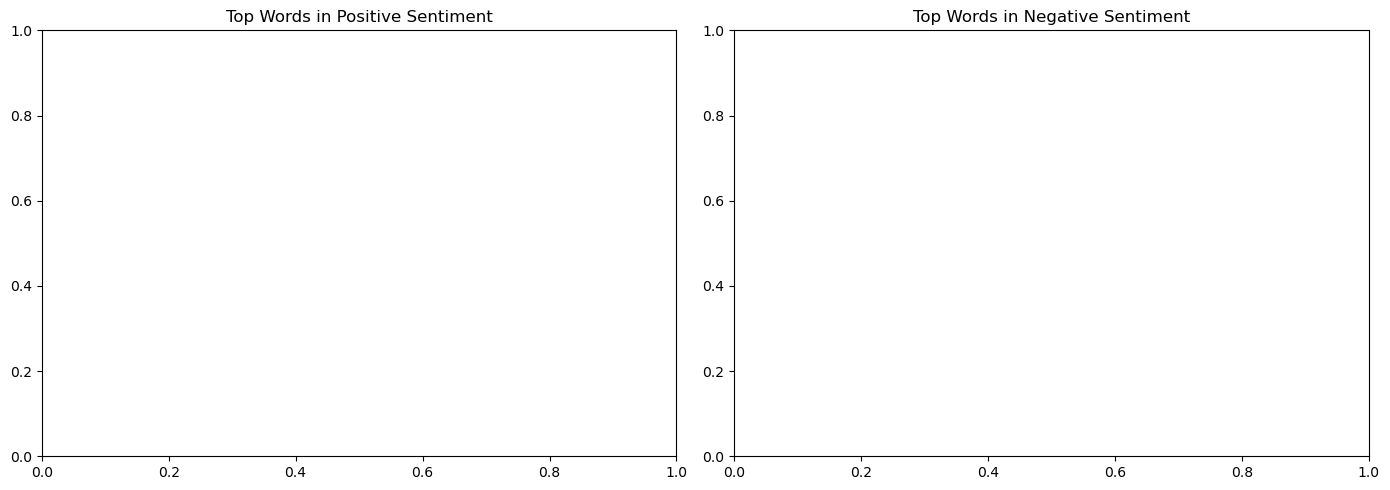

In [27]:
from collections import Counter
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def get_top_n_words(text_series, n=15):
    all_words = " ".join(text_series).lower().split()
    words = [word for word in all_words if word not in stop_words and word.isalpha()]
    return Counter(words).most_common(n)

# Top 15 positive words
pos_words = get_top_n_words(df[df['Sentiment'] == 'Positive']['Text'], 15)
neg_words = get_top_n_words(df[df['Sentiment'] == 'Negative']['Text'], 15)

# Convert to DataFrame for plotting
pos_df = pd.DataFrame(pos_words, columns=['word', 'count'])
neg_df = pd.DataFrame(neg_words, columns=['word', 'count'])

# Plot
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=pos_df, x='count', y='word', palette='Greens_d')
plt.title('Top Words in Positive Sentiment')

plt.subplot(1, 2, 2)
sns.barplot(data=neg_df, x='count', y='word', palette='Reds_d')
plt.title('Top Words in Negative Sentiment')

plt.tight_layout()
plt.show()


In [23]:
!pip install wordcloud


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    f1_score, roc_auc_score, roc_curve, auc, mean_squared_error
)
from sklearn.preprocessing import label_binarize
import numpy as np
import pandas as pd

# --- Basic Metrics ---
print("Accuracy:", accuracy_score(y_test_encoded, y_pred))
print("F1 Score (macro):", f1_score(y_test_encoded, y_pred, average='macro'))
print("F1 Score (weighted):", f1_score(y_test_encoded, y_pred, average='weighted'))
print("RMSE:", np.sqrt(mean_squared_error(y_test_encoded, y_pred)))
print("\nClassification Report:\n", classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_))

# --- Confusion Matrix ---
cm = confusion_matrix(y_test_encoded, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=False, fmt="d", cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# --- ROC Curve (One-vs-Rest) ---
# Binarize the labels for ROC AUC
n_classes = len(label_encoder.classes_)
y_test_bin = label_binarize(y_test_encoded, classes=range(n_classes))
y_score = xgb.predict_proba(X_test_vec)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for a few classes (not all, to avoid clutter)
plt.figure(figsize=(12, 8))
for i in range(min(n_classes, 5)):  # Limit to 5 classes
    plt.plot(fpr[i], tpr[i], label=f'Class {label_encoder.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Multi-class)")
plt.legend(loc="lower right")
plt.grid()
plt.show()


NameError: name 'y_test_encoded' is not defined

In [2]:
comparison_df = pd.DataFrame({
    'Model': ['XGBoost'],
    'Accuracy': [accuracy_score(y_test_encoded, y_pred)],
    'F1 Macro': [f1_score(y_test_encoded, y_pred, average='macro')],
    'F1 Weighted': [f1_score(y_test_encoded, y_pred, average='weighted')],
    'RMSE': [np.sqrt(mean_squared_error(y_test_encoded, y_pred))]
})
print("\nModel Comparison:\n", comparison_df)


NameError: name 'y_test_encoded' is not defined

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, f1_score, mean_squared_error,
    confusion_matrix, roc_auc_score, roc_curve, auc
)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize
import numpy as np

# --- Load Data ---
df = pd.read_csv("sentimentdataset.csv")

# --- Drop rare sentiment classes (with only 1 instance) ---
df = df[df['Sentiment'].map(df['Sentiment'].value_counts()) > 1]

# --- Feature and Target ---
X = df['Text']
y = df['Sentiment']

# --- Label Encoding ---
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# --- Split Data ---
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# --- Vectorize Text ---
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# --- Train XGBoost ---
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train_vec, y_train_encoded)
y_pred = xgb.predict(X_test_vec)

# --- Evaluation ---
print("Accuracy:", accuracy_score(y_test_encoded, y_pred))
print("F1 Score (macro):", f1_score(y_test_encoded, y_pred, average='macro'))
print("F1 Score (weighted):", f1_score(y_test_encoded, y_pred, average='weighted'))
print("RMSE:", np.sqrt(mean_squared_error(y_test_encoded, y_pred)))
print("\nClassification Report:\n", classification_report(
    y_test_encoded, y_pred, target_names=label_encoder.classes_
))

# --- Confusion Matrix ---
cm = confusion_matrix(y_test_encoded, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=False, fmt="d", cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# --- ROC Curve (One-vs-Rest for Multi-Class) ---
n_classes = len(label_encoder.classes_)
y_test_bin = label_binarize(y_test_encoded, classes=range(n_classes))
y_score = xgb.predict_proba(X_test_vec)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(12, 8))
for i in range(min(n_classes, 5)):  # Limit to top 5 classes for visibility
    plt.plot(fpr[i], tpr[i], label=f'{label_encoder.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Top 5 Classes)')
plt.legend(loc="lower right")
plt.grid()
plt.show()


OSError: [Errno 22] Invalid argument

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay,
    roc_auc_score, roc_curve, auc, mean_squared_error
)
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from xgboost import XGBClassifier

# --- Basic Metrics ---
print("Accuracy:", accuracy_score(y_test_encoded, y_pred))
print("F1 Score (macro):", f1_score(y_test_encoded, y_pred, average='macro'))
print("F1 Score (weighted):", f1_score(y_test_encoded, y_pred, average='weighted'))

# --- RMSE ---
rmse = np.sqrt(mean_squared_error(y_test_encoded, y_pred))
print("RMSE:", rmse)

# --- Confusion Matrix ---
cm = confusion_matrix(y_test_encoded, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# --- ROC Curve for Multiclass ---
# Binarize the output
y_test_bin = label_binarize(y_test_encoded, classes=np.unique(y_test_encoded))
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 8))
colors = plt.cm.get_cmap('tab10', n_classes)
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors(i), lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc='lower right')
plt.show()


NameError: name 'y_test_encoded' is not defined

In [6]:
# --- Imports ---
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, f1_score, confusion_matrix,
    classification_report, roc_auc_score, roc_curve,
    mean_squared_error
)
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load Dataset ---
df = pd.read_csv("sentimentdataset.csv")

# --- Drop rare sentiment classes ---
df = df[df['Sentiment'].map(df['Sentiment'].value_counts()) > 1]

# --- Features and labels ---
X = df['Text']
y = df['Sentiment']

# --- Encode labels ---
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# --- Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# --- TF-IDF Vectorization ---
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# --- Logistic Regression ---
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)
y_pred = model.predict(X_test_vec)
y_proba = model.predict_proba(X_test_vec)

# --- Evaluation Metrics ---
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score (Macro):", f1_score(y_test, y_pred, average='macro'))
print("F1 Score (Weighted):", f1_score(y_test, y_pred, average='weighted'))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# --- ROC Curve (for binary only) ---
if len(label_encoder.classes_) == 2:
    fpr, tpr, _ = roc_curve(y_test, y_proba[:, 1])
    auc = roc_auc_score(y_test, y_proba[:, 1])
    plt.figure()
    plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc:.2f})")
    plt.plot([0, 1], [0, 1], linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.show()
else:
    print("ROC curve is only shown for binary classification.")


OSError: [Errno 22] Invalid argument

In [7]:
# --- Import Libraries ---
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, mean_squared_error, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# --- Load Dataset ---
df = pd.read_csv("sentimentdataset.csv")  # Make sure the file path is correct

# --- Preprocessing ---
# Drop rows with missing values (optional depending on the dataset)
df = df.dropna()

# Convert sentiments to labels (assuming the sentiment column is 'Sentiment')
le = LabelEncoder()
df['Sentiment'] = le.fit_transform(df['Sentiment'])  # Encode the sentiment labels

# Split data into features (X) and target (y)
X = df['Text']  # Assuming the text column is 'Text'
y = df['Sentiment']

# Step 2: Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 3: Text vectorization using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# --- Model Selection ---
# You can switch between these models: Random Forest, Naive Bayes, or Logistic Regression

# Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
# Naive Bayes
# model = MultinomialNB()
# Logistic Regression
# model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
model.fit(X_train_tfidf, y_train)

# Predict on test data
y_pred = model.predict(X_test_tfidf)

# --- Model Evaluation ---
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# F1 Score (Macro)
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))

# F1 Score (Weighted)
print("F1 Score (weighted):", f1_score(y_test, y_pred, average='weighted'))

# ROC-AUC
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_tfidf), multi_class='ovr')
print("ROC-AUC:", roc_auc)

# RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)

# --- Visualizations ---
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test_tfidf)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


OSError: [Errno 22] Invalid argument